# College Admission Chance Prediction Using Ensemble Learning

### Jiahua Song
### Department of Statistics
### University of Connecticut

# Introduction
A college is an inevitable place for higher education and a better future. Although some talented people can achieve their goals without higher education, most people need to have a college education to enable them to be capable of at least getting a decent job to make money. It also allows ambitious students to explore the world's frontiers. Card (1999) examines the role of college education in promoting social and economic development. The author argues that college education plays a critical role in improving individuals' economic outcomes and reducing income inequality. As a result, college graduates have higher earnings and are more likely to be employed in high-skilled occupations. Furthermore, a college education promotes social mobility and helps reduce poverty. 

In order to help students to have a better future, it is necessary for us to understand the criteria and important factors in admission. There are some existing works using the data to predict admission chance. However, I will use another machine learning method called ensemble learning to predict the chance and compare the results with some of them. Therefore, we will predict a college admission chance by using ensemble learning for more transparent criteria. The results may help us to understand which factors are important in college application.

# Specific Aims
My aim is to use the machine learning method called ensemble learning, including random forest, XGBoost, and possibly Gradient-boosted decision trees (GBDT) to do a regression analysis on the chance of admission and other possible parameters given in the data. 

# Gathering Data

We can get the data from Kaggle. The link is: https://www.kaggle.com/datasets/mohansacharya/graduate-admissions. After downloading it, we can directly use the path and pandas to load the data.

In [ ]:
import pandas as pd
data = pd.read_csv('/Users/jiahuasong/Documents/Uconn/Senior_2nd/STAT 4185/Final_Project/Data/Admission_Predict_Ver1.1.csv')
data.head(10)

The data consists of $500$ individuals data, and $9$ parameters and $1$ of them is the chance of admission. They are GRE Scores ( out of 340 )
, TOEFL Scores ( out of 120 )
, University Rating ( out of 5 )
, Statement of Purpose and Letter of Recommendation Strength ( out of 5 )
, Undergraduate GPA ( out of 10 )
, Research Experience ( either 0 or 1 )
, Chance of Admit ( ranging from 0 to 1 ). 
The first $10$ rows are shown above. 

# Data Cleaning

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data.columns

In [ ]:
#Drop the serial column
data = data.drop('Serial No.', axis = 1)
data.head()

In [ ]:
#Describe the dataframe.
data.info()

In [ ]:
data.isnull().sum()

# Exploring the Data with some descriptive statistics

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))
sns.distplot(data['GRE Score'], kde=False, ax=axs[0, 0])
axs[0, 0].set_title("Distribution of GRE Scores")
sns.distplot(data['TOEFL Score'], kde=False, ax=axs[0, 1])
axs[0, 1].set_title("Distribution of TOEFL Scores")
sns.distplot(data['University Rating'], kde=False, ax=axs[0, 2])
axs[0, 2].set_title("Distribution of University Rating")
sns.distplot(data['SOP'], kde=False, ax=axs[1, 0])
axs[1, 0].set_title("Distribution of SOP Ratings")
sns.distplot(data['CGPA'], kde=False, ax=axs[1, 1])
axs[1, 1].set_title("Distribution of CGPA")

# remove the empty subplot
fig.delaxes(axs[1, 2])

plt.tight_layout()
plt.show()


They all seem normally distributed.

### Relationship and Scatter plots of factors

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

sns.regplot(x="GRE Score", y="TOEFL Score", data=data, ax=axs[0, 0])
axs[0, 0].set_title("GRE Score vs TOEFL Score")

sns.regplot(x="GRE Score", y="CGPA", data=data, ax=axs[0, 1])
axs[0, 1].set_title("GRE Score vs CGPA")

sns.regplot(x="CGPA", y="SOP", data=data, ax=axs[1, 0])
axs[1, 0].set_title("CGPA vs SOP")

sns.regplot(x="TOEFL Score", y="SOP", data=data, ax=axs[1, 1])
axs[1, 1].set_title("TOEFL Score vs SOP")

plt.tight_layout()
plt.show()

We can see from the plots above. TOEFL and CGPA seem to have strong positive correlation with GRE score. For lower two plots, we can see the weak correlation between CGPA and SOP and TOEFL and SOP. 

# Boxplots

In [ ]:
sns.boxplot(x='SOP', y=data.iloc[:, -1], data=data)

In [ ]:
sns.boxplot(x=data.iloc[:, 4], y=data.iloc[:, -1], data=data)

Based on two plots above, we notice that SOP and LOR are important. However, there are many outliers for each ordinal catagotical variables. This means we may have some exceptions but generally the positive correlation occurs. 

# Correlation Matrix

In [ ]:
corr_data = data.corr()
figure = plt.figure()
plt.figure(figsize = (8, 8))
sns.heatmap(corr_data, cmap = 'YlGnBu', annot = True)

We notice directly from the correlation matrix that the GRE, TOEFL, and CGPA are strongly correlated. This may cause confounding effect. We may try to use each one separately and then use all of them to fit the models. Roughly from the matrix, we conclude that CGPA is the most important factor for graduate application. Then, GRE, TOEFL, University Rating, SOP, LOR, Research. 

In [ ]:

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# M1
corr_data1 = data.iloc[:, [1, 2, 3, 4, 6, 7]].corr()
sns.heatmap(corr_data1, cmap='YlGnBu', annot=True, ax=axs[0])
axs[0].set_title('Correlation Heatmap 1')

# M2
corr_data2 = data.iloc[:, [2, 3, 4, 5, 6, 7]].corr()
sns.heatmap(corr_data2, cmap='YlGnBu', annot=True, ax=axs[1])
axs[1].set_title('Correlation Heatmap 2')

# M3
corr_data3 = data.iloc[:, [0, 2, 3, 4, 6, 7]].corr()
sns.heatmap(corr_data3, cmap='YlGnBu', annot=True, ax=axs[2])
axs[2].set_title('Correlation Heatmap 3')


plt.subplots_adjust(wspace=0.3)
plt.show()


We may use Heatmap 1 since it has more weakly correlated factors. This aviods partly of collinearity problem. 

# Research Design and Methods

We will clean data first. Then, we will visualize and explore the data to see the basic statistics of the data. The design of the study is based on ensemble learning. We will mainly focus on random forest. Firstly, we have to bootstrap the data due to the size of the data is relatively small. Then, we aggregate the data. The two processes combined is called Bagging (Bootstrap and aggregating). As the data are getting larger and we only select a small part of them (Bootstrap), we will have $\lim_{n\to \infty}(1-\frac{1}{n})^{n}=\frac{1}{e}\approx 0.368$. This means by using this method, we will naturally get $36.8\%$ of data that will not be selected. Thus, we use these data as a test set. 

Then, we process each data set to a decision tree model and vote for outcomes. The decision tree involves Gini index for regression.
\begin{equation}
  \label{eq:gini}
  Gini(p)=2p(1-p),
\end{equation}
where $p$ is the proportion of data points in the classified region over total number of data points. 

The general Gini index formula is
$$Gini(p)=\sum_{i}p_{i}(1-p_{i})=1-\sum_{i}p_{i}^{2},$$
where $p_{i}$ is a proportion of each classification. 

Since we are dealing with the random forest rather than a simple decision tree, we will divide the tree to the purest, which means overfitting the data to classify all points correctly.

The voting process will overcome the problem of overfitting. Then, we will include some other possibilities to compare the result of the importance of parameters.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error


In [ ]:
# If you do not have xgboost, please run the following code and do the same fashion if you need other libraries
# !pip install xgboost
# !pip install catboost

# Pre-Process, Modeling, Deploy

In [ ]:
# split data
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# training
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
xgb = XGBRegressor(n_estimators=100, random_state=42)
xgb.fit(X_train, y_train)
gbdt = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbdt.fit(X_train, y_train)

# modeling
rf_pred = rf.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
print(f"Random Forest MSE: {rf_mse}")
xgb_pred = xgb.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_pred)
print(f"XGBoost MSE: {xgb_mse}")
gbdt_pred = gbdt.predict(X_test)
gbdt_mse = mean_squared_error(y_test, gbdt_pred)
print(f"GBDT MSE: {gbdt_mse}")

# feature importance
rf_feature_importance = rf.feature_importances_
xgb_feature_importance = xgb.feature_importances_
gbdt_feature_importance = gbdt.feature_importances_

# visualization
feature_names = data.columns[:-1]
plt.barh(feature_names, rf_feature_importance)
plt.title("Random Forest Feature Importance")
plt.show()

plt.barh(feature_names, xgb_feature_importance)
plt.title("XGBoost Feature Importance")
plt.show()

plt.barh(feature_names, gbdt_feature_importance)
plt.title("Gradient Boosting Feature Importance")
plt.show()


# Ensemble Learning

In [ ]:
# Split the data
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training and Evaluating 1
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
print("Random Forest RMSE:", rf_rmse)

# Training and Evaluating 2
xgb = XGBRegressor(n_estimators=100, random_state=42)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_pred))
print("XGBoost RMSE:", xgb_rmse)

# Training and Evaluating 3
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
gb_rmse = np.sqrt(mean_squared_error(y_test, gb_pred))
print("Gradient Boosting RMSE:", gb_rmse)

# Ensemble the models using a weighted average
ensemble_pred = (0.9 * rf_pred + 0.05 * xgb_pred + 0.05 * gb_pred)
ensemble_rmse = np.sqrt(mean_squared_error(y_test, ensemble_pred))
print("Ensemble RMSE:", ensemble_rmse)


In [ ]:
# Split the data
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train multiple models
models = []
models.append(('RandomForest', RandomForestRegressor(random_state=42)))
models.append(('XGB', XGBRegressor(random_state=42)))
models.append(('GBDT', GradientBoostingRegressor(random_state=42)))

# Fit the models
for name, model in models:
    model.fit(X_train, y_train)

# Feature importances
feature_importances = np.zeros((len(models), len(X_train.columns)))
for i, (name, model) in enumerate(models):
    feature_importances[i] = model.feature_importances_

mean_importances = np.mean(feature_importances, axis=0)


# Plot the feature importances
feature_names = X_train.columns
sorted_idx = mean_importances.argsort()

plt.barh(range(len(sorted_idx)), mean_importances[sorted_idx])
plt.yticks(range(len(sorted_idx)), feature_names[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature Importances')

plt.show()


## Removed correlated factors with CGPA as representative

In [ ]:
data.iloc[:,[2,3,4,5,6,7]]

In [ ]:
# split data
data = data.iloc[:,[2,3,4,5,6,7]]
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)

# training
rf = RandomForestRegressor(n_estimators=100, random_state=77)
rf.fit(X_train, y_train)
xgb = XGBRegressor(n_estimators=100, random_state=77)
xgb.fit(X_train, y_train)
gbdt = GradientBoostingRegressor(n_estimators=100, random_state=77)
gbdt.fit(X_train, y_train)

# modeling
rf_pred = rf.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
print(f"Random Forest MSE: {rf_mse}")
xgb_pred = xgb.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_pred)
print(f"XGBoost MSE: {xgb_mse}")
gbdt_pred = gbdt.predict(X_test)
gbdt_mse = mean_squared_error(y_test, gbdt_pred)
print(f"GBDT MSE: {gbdt_mse}")

# feature importance
rf_feature_importance = rf.feature_importances_
xgb_feature_importance = xgb.feature_importances_
gbdt_feature_importance = gbdt.feature_importances_

# visualization
feature_names = data.columns[:-1]
plt.barh(feature_names, rf_feature_importance)
plt.title("Random Forest Feature Importance")
plt.show()

plt.barh(feature_names, xgb_feature_importance)
plt.title("XGBoost Feature Importance")
plt.show()

plt.barh(feature_names, gbdt_feature_importance)
plt.title("Gradient Boosting Feature Importance")
plt.show()


# Conclusion and Explanatin

We modeled three models for learning and then voted based on the MSE results. We can conclude from the feature importance of factors from the plots above. 

Random Forest MSE: 0.004346617800000005 wins the entire data fitting with the lowest MSE. We conclude that the importance of graduate admission chance ranks from highest to lowest affected by CGPA, GRE Score, TOEFL Score, SOP, LOR, Research, and University Rating. 

After ensemble learning based on these three, 
we notice that Ensemble RMSE: 0.06584286884357177 indeed beats the rest of them with the lowest MSE. We conclude that the importance of graduate admission chance ranks from highest to lowest affected by CGPA, GRE Score, SOP, TOEFL Score, LOR, Research, and University Rating. 


After removing the correlated factors, 
we notice GBDT MSE: 0.00544064530298938 wins the restricted data fitting with the lowest MSE. We conclude that the importance of graduate admission chance ranks from highest to lowest affected by CGPA, LOR, University Rating, SOP, and Research. 

Conclusively, the CGPA is always the most critical factor for graduate admission, and GRE and TOEFL scores are secondary. Then, SOP, LOR, Research, and University Rating are followed. However, the hierarchy is not definite. The results on ensemble learning for restricted and non-restricted data coincide with the basic description we did in the exploring data part. Some outliers exist, so it may vary depending on how strong your SOP and LOR are. However, based on this data, the hierarchy did exist statistically. 

<Axes: xlabel='LOR ', ylabel='Chance of Admit '>

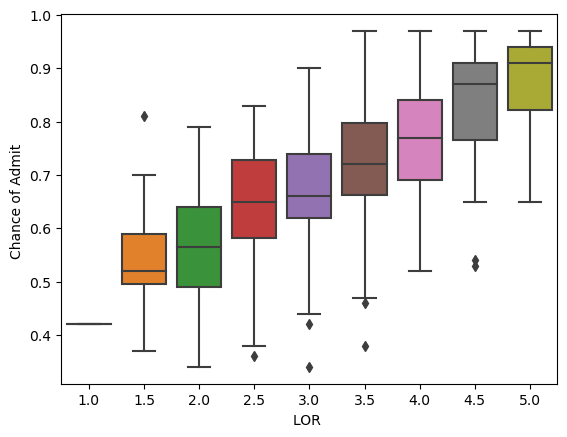

In [10]:
sns.boxplot(x=data.iloc[:, 4], y=data.iloc[:, -1], data=data)

Based on two plots above, we notice that SOP and LOR are important. However, there are many outliers for each ordinal catagotical variables. This means we may have some exceptions but generally the positive correlation occurs. 

# Correlation Matrix

<Axes: >

<Figure size 640x480 with 0 Axes>

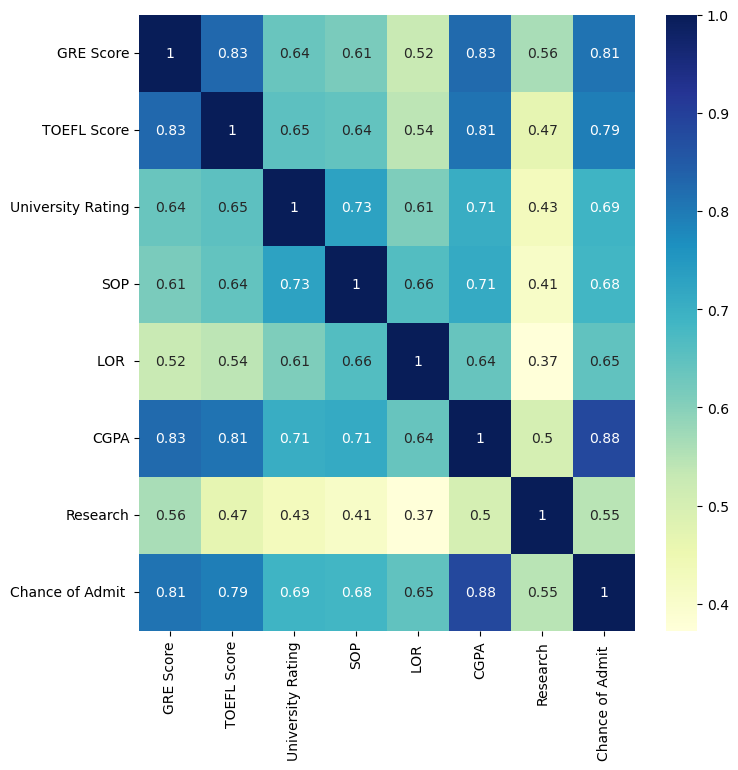

In [11]:
corr_data = data.corr()
figure = plt.figure()
plt.figure(figsize = (8, 8))
sns.heatmap(corr_data, cmap = 'YlGnBu', annot = True)

We notice directly from the correlation matrix that the GRE, TOEFL, and CGPA are strongly correlated. This may cause confounding effect. We may try to use each one separately and then use all of them to fit the models. Roughly from the matrix, we conclude that CGPA is the most important factor for graduate application. Then, GRE, TOEFL, University Rating, SOP, LOR, Research. 

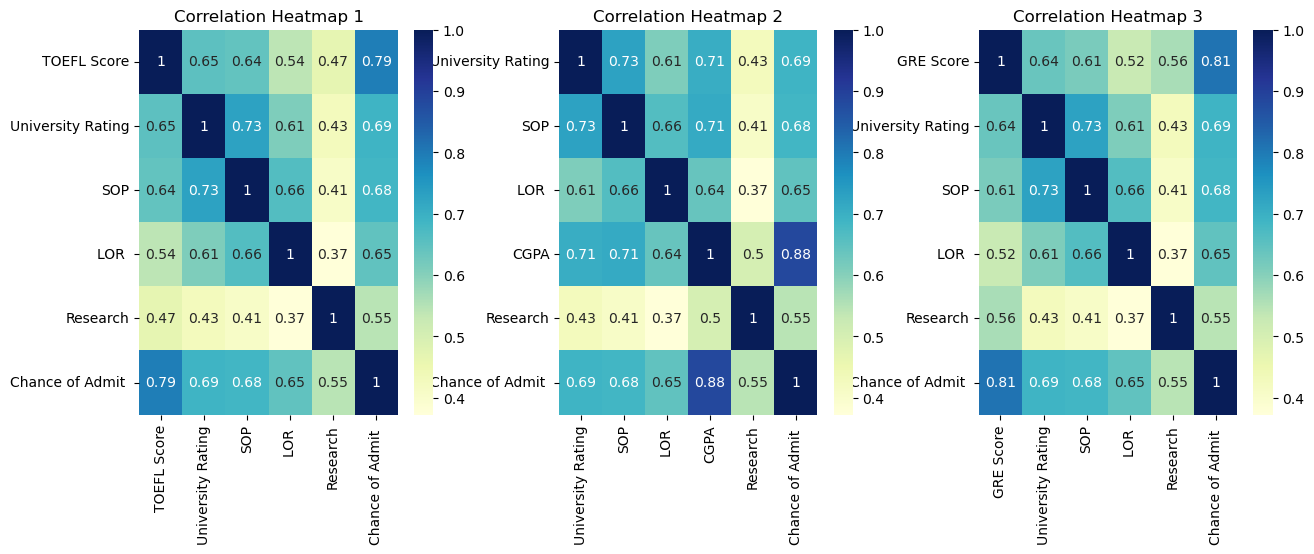

In [12]:

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# M1
corr_data1 = data.iloc[:, [1, 2, 3, 4, 6, 7]].corr()
sns.heatmap(corr_data1, cmap='YlGnBu', annot=True, ax=axs[0])
axs[0].set_title('Correlation Heatmap 1')

# M2
corr_data2 = data.iloc[:, [2, 3, 4, 5, 6, 7]].corr()
sns.heatmap(corr_data2, cmap='YlGnBu', annot=True, ax=axs[1])
axs[1].set_title('Correlation Heatmap 2')

# M3
corr_data3 = data.iloc[:, [0, 2, 3, 4, 6, 7]].corr()
sns.heatmap(corr_data3, cmap='YlGnBu', annot=True, ax=axs[2])
axs[2].set_title('Correlation Heatmap 3')


plt.subplots_adjust(wspace=0.3)
plt.show()


We may use Heatmap 1 since it has more weakly correlated factors. This aviods partly of collinearity problem. 

# Research Design and Methods

We will clean data first. Then, we will visualize and explore the data to see the basic statistics of the data. The design of the study is based on ensemble learning. We will mainly focus on random forest. Firstly, we have to bootstrap the data due to the size of the data is relatively small. Then, we aggregate the data. The two processes combined is called Bagging (Bootstrap and aggregating). As the data are getting larger and we only select a small part of them (Bootstrap), we will have $\lim_{n\to \infty}(1-\frac{1}{n})^{n}=\frac{1}{e}\approx 0.368$. This means by using this method, we will naturally get $36.8\%$ of data that will not be selected. Thus, we use these data as a test set. 

Then, we process each data set to a decision tree model and vote for outcomes. The decision tree involves Gini index for regression.
\begin{equation}
  \label{eq:gini}
  Gini(p)=2p(1-p),
\end{equation}
where $p$ is the proportion of data points in the classified region over total number of data points. 

The general Gini index formula is
$$Gini(p)=\sum_{i}p_{i}(1-p_{i})=1-\sum_{i}p_{i}^{2},$$
where $p_{i}$ is a proportion of each classification. 

Since we are dealing with the random forest rather than a simple decision tree, we will divide the tree to the purest, which means overfitting the data to classify all points correctly.

The voting process will overcome the problem of overfitting. Then, we will include some other possibilities to compare the result of the importance of parameters.

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error


In [14]:
# If you do not have xgboost, please run the following code and do the same fashion if you need other libraries
# !pip install xgboost
# !pip install catboost

# Pre-Process, Modeling, Deploy

Random Forest MSE: 0.004346617800000005
XGBoost MSE: 0.004952965819404751
GBDT MSE: 0.0044618891653490774


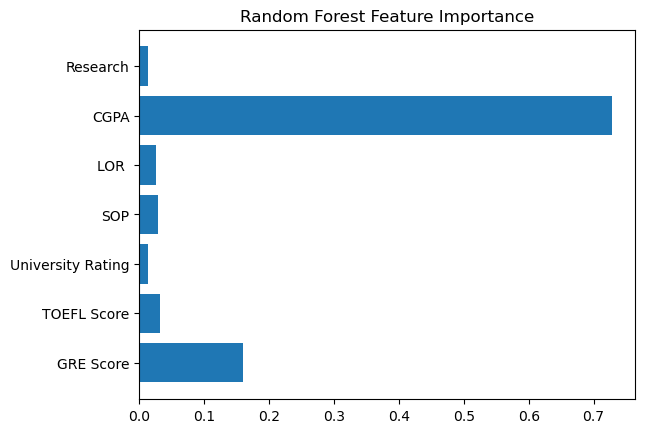

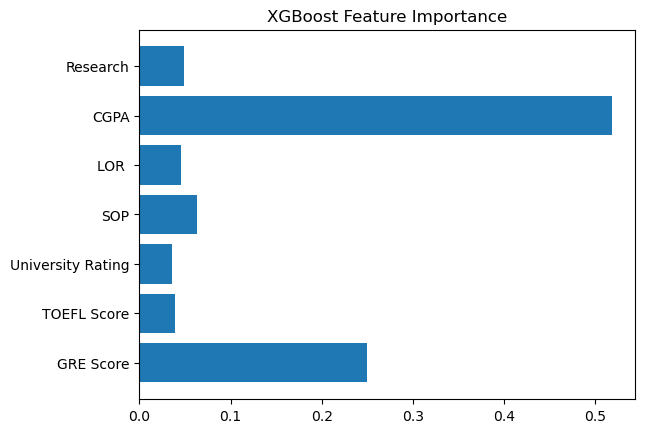

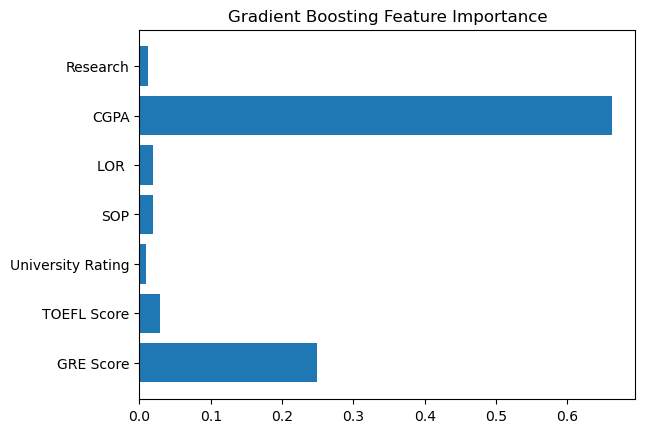

In [15]:
# split data
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# training
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
xgb = XGBRegressor(n_estimators=100, random_state=42)
xgb.fit(X_train, y_train)
gbdt = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbdt.fit(X_train, y_train)

# modeling
rf_pred = rf.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
print(f"Random Forest MSE: {rf_mse}")
xgb_pred = xgb.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_pred)
print(f"XGBoost MSE: {xgb_mse}")
gbdt_pred = gbdt.predict(X_test)
gbdt_mse = mean_squared_error(y_test, gbdt_pred)
print(f"GBDT MSE: {gbdt_mse}")

# feature importance
rf_feature_importance = rf.feature_importances_
xgb_feature_importance = xgb.feature_importances_
gbdt_feature_importance = gbdt.feature_importances_

# visualization
feature_names = data.columns[:-1]
plt.barh(feature_names, rf_feature_importance)
plt.title("Random Forest Feature Importance")
plt.show()

plt.barh(feature_names, xgb_feature_importance)
plt.title("XGBoost Feature Importance")
plt.show()

plt.barh(feature_names, gbdt_feature_importance)
plt.title("Gradient Boosting Feature Importance")
plt.show()


# Ensemble Learning

In [16]:
# Split the data
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training and Evaluating 1
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
print("Random Forest RMSE:", rf_rmse)

# Training and Evaluating 2
xgb = XGBRegressor(n_estimators=100, random_state=42)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_pred))
print("XGBoost RMSE:", xgb_rmse)

# Training and Evaluating 3
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
gb_rmse = np.sqrt(mean_squared_error(y_test, gb_pred))
print("Gradient Boosting RMSE:", gb_rmse)

# Ensemble the models using a weighted average
ensemble_pred = (0.9 * rf_pred + 0.05 * xgb_pred + 0.05 * gb_pred)
ensemble_rmse = np.sqrt(mean_squared_error(y_test, ensemble_pred))
print("Ensemble RMSE:", ensemble_rmse)


Random Forest RMSE: 0.06592888441343449
XGBoost RMSE: 0.07037731040189552
Gradient Boosting RMSE: 0.06679737394051563
Ensemble RMSE: 0.06584286884357177


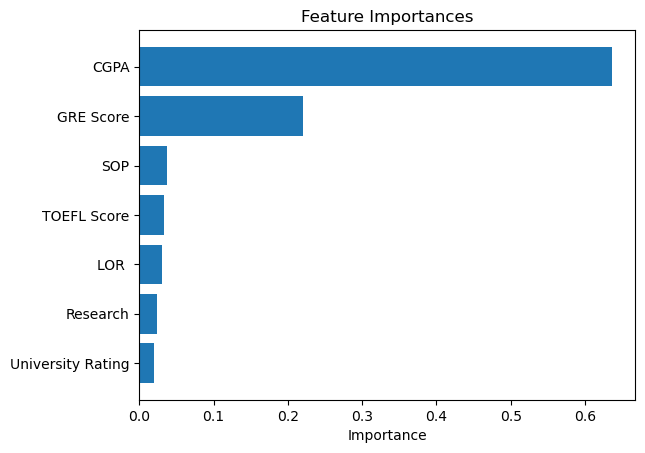

In [17]:
# Split the data
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train multiple models
models = []
models.append(('RandomForest', RandomForestRegressor(random_state=42)))
models.append(('XGB', XGBRegressor(random_state=42)))
models.append(('GBDT', GradientBoostingRegressor(random_state=42)))

# Fit the models
for name, model in models:
    model.fit(X_train, y_train)

# Feature importances
feature_importances = np.zeros((len(models), len(X_train.columns)))
for i, (name, model) in enumerate(models):
    feature_importances[i] = model.feature_importances_

mean_importances = np.mean(feature_importances, axis=0)


# Plot the feature importances
feature_names = X_train.columns
sorted_idx = mean_importances.argsort()

plt.barh(range(len(sorted_idx)), mean_importances[sorted_idx])
plt.yticks(range(len(sorted_idx)), feature_names[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature Importances')

plt.show()


## Removed correlated factors with CGPA as representative

In [18]:
data.iloc[:,[2,3,4,5,6,7]]

,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,4,4.5,4.5,9.65,1,0.92
1,4,4.0,4.5,8.87,1,0.76
2,3,3.0,3.5,8.00,1,0.72
3,3,3.5,2.5,8.67,1,0.80
4,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...
495,5,4.5,4.0,9.02,1,0.87
496,5,5.0,5.0,9.87,1,0.96
497,5,4.5,5.0,9.56,1,0.93
498,4,4.0,5.0,8.43,0,0.73


Random Forest MSE: 0.005666669240694449
XGBoost MSE: 0.006570434116698485
GBDT MSE: 0.00544064530298938


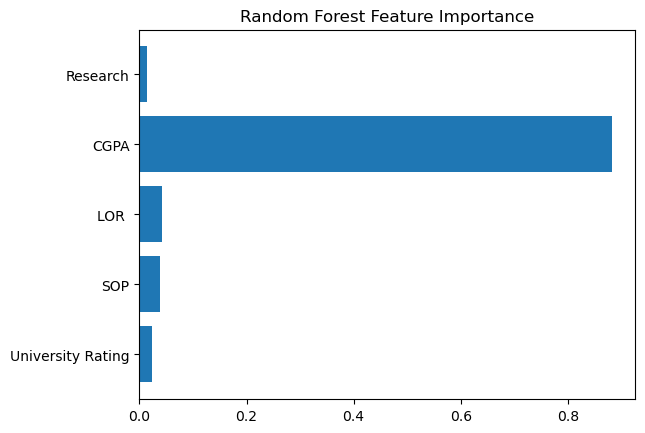

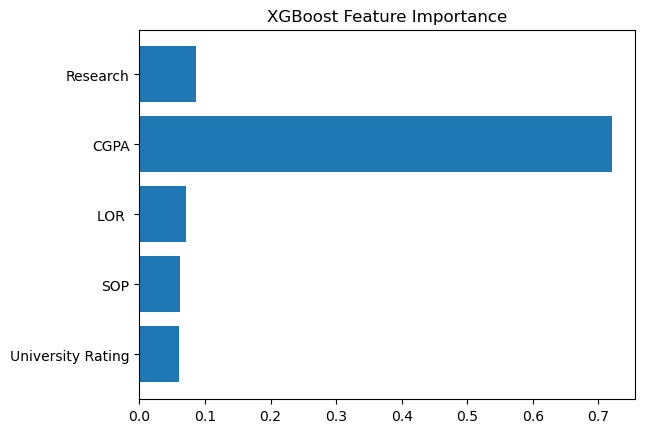

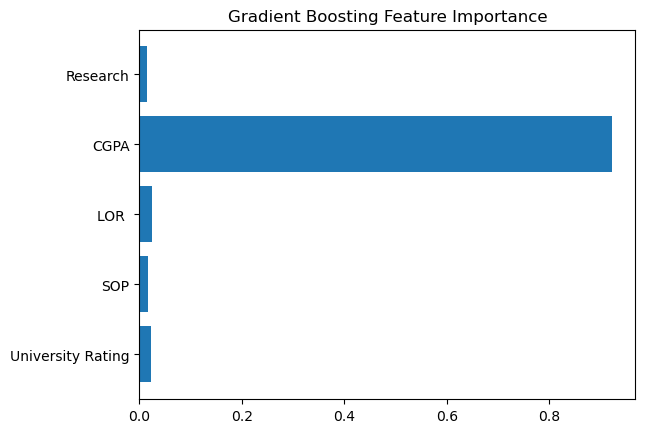

In [19]:
# split data
data = data.iloc[:,[2,3,4,5,6,7]]
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)

# training
rf = RandomForestRegressor(n_estimators=100, random_state=77)
rf.fit(X_train, y_train)
xgb = XGBRegressor(n_estimators=100, random_state=77)
xgb.fit(X_train, y_train)
gbdt = GradientBoostingRegressor(n_estimators=100, random_state=77)
gbdt.fit(X_train, y_train)

# modeling
rf_pred = rf.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
print(f"Random Forest MSE: {rf_mse}")
xgb_pred = xgb.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_pred)
print(f"XGBoost MSE: {xgb_mse}")
gbdt_pred = gbdt.predict(X_test)
gbdt_mse = mean_squared_error(y_test, gbdt_pred)
print(f"GBDT MSE: {gbdt_mse}")

# feature importance
rf_feature_importance = rf.feature_importances_
xgb_feature_importance = xgb.feature_importances_
gbdt_feature_importance = gbdt.feature_importances_

# visualization
feature_names = data.columns[:-1]
plt.barh(feature_names, rf_feature_importance)
plt.title("Random Forest Feature Importance")
plt.show()

plt.barh(feature_names, xgb_feature_importance)
plt.title("XGBoost Feature Importance")
plt.show()

plt.barh(feature_names, gbdt_feature_importance)
plt.title("Gradient Boosting Feature Importance")
plt.show()


# Conclusion and Explanatin

We modeled three models for learning and then voted based on the MSE results. We can conclude from the feature importance of factors from the plots above. 

Random Forest MSE: 0.004346617800000005 wins the entire data fitting with the lowest MSE. We conclude that the importance of graduate admission chance ranks from highest to lowest affected by CGPA, GRE Score, TOEFL Score, SOP, LOR, Research, and University Rating. 

After ensemble learning based on these three, 
we notice that Ensemble RMSE: 0.06584286884357177 indeed beats the rest of them with the lowest MSE. We conclude that the importance of graduate admission chance ranks from highest to lowest affected by CGPA, GRE Score, SOP, TOEFL Score, LOR, Research, and University Rating. 


After removing the correlated factors, 
we notice GBDT MSE: 0.00544064530298938 wins the restricted data fitting with the lowest MSE. We conclude that the importance of graduate admission chance ranks from highest to lowest affected by CGPA, LOR, University Rating, SOP, and Research. 

Conclusively, the CGPA is always the most critical factor for graduate admission, and GRE and TOEFL scores are secondary. Then, SOP, LOR, Research, and University Rating are followed. However, the hierarchy is not definite. The results on ensemble learning for restricted and non-restricted data coincide with the basic description we did in the exploring data part. Some outliers exist, so it may vary depending on how strong your SOP and LOR are. However, based on this data, the hierarchy did exist statistically. 